In [1]:
from pynq.overlays.base import BaseOverlay
from pynq.lib.video import *
base = BaseOverlay("base.bit")

In [2]:
hdmi_in = base.video.hdmi_in
hdmi_out = base.video.hdmi_out

hdmi_in.configure(PIXEL_GRAY)
hdmi_out.configure(hdmi_in.mode)

hdmi_in.start()
hdmi_out.start()

print(hdmi_in.mode)

VideoMode: width=1920 height=1080 bpp=8


In [7]:
import cv2 as openCV
import timeit

iterations = 30
def test(iterations):
    for i in range(iterations):
        inframe = hdmi_in.readframe()
        outframe = hdmi_out.newframe()
        openCV.Sobel(inframe,-1,1,0,ksize=5,dst=outframe)
        inframe.freebuffer()
        hdmi_out.writeframe(outframe)
    
%timeit(test(iterations))
print("Frames per second using OpenCV:  " + str(iterations / timeit(test(iterations))))

10.8 s ± 17.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


TypeError: 'module' object is not callable

In [10]:
import cv2 as openCV
import time

iterations = 30

start = time.time()
for i in range(iterations):
    inframe = hdmi_in.readframe()
    outframe = hdmi_out.newframe()
    openCV.Sobel(inframe,-1,1,0,ksize=5,dst=outframe)
    inframe.freebuffer()
    hdmi_out.writeframe(outframe)
end = time.time()
print("Frames per second using OpenCV:  " + str(iterations / (end - start)))

Frames per second using OpenCV:  2.756718131607253


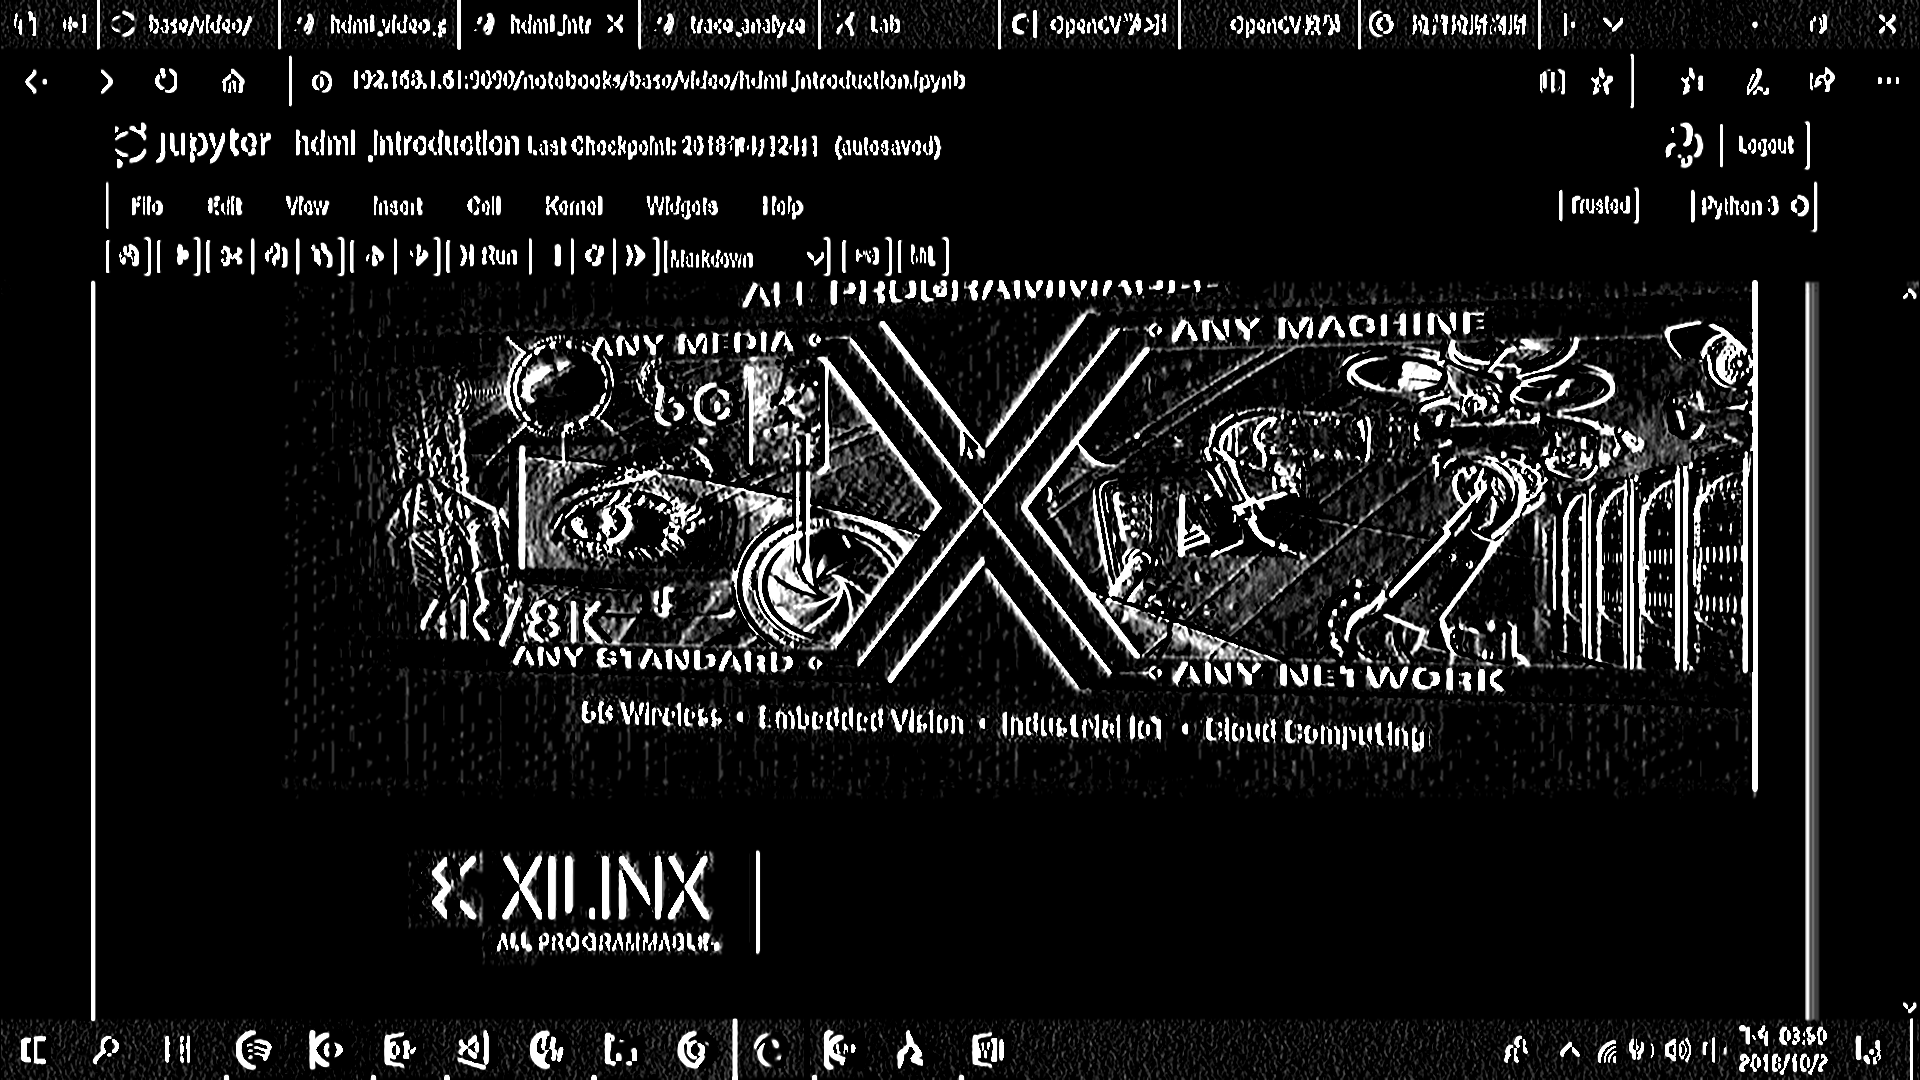

In [11]:
import PIL.Image

image = PIL.Image.fromarray(outframe)
image

In [12]:
iterations = 30

start = time.time()
for i in range(iterations):
    inframe = hdmi_in.readframe()
    outframe = hdmi_out.newframe()
    openCV.Laplacian(inframe,-1,ksize=5,dst=outframe)
    inframe.freebuffer()
    hdmi_out.writeframe(outframe)
end = time.time()
print("Frames per second using OpenCV:  " + str(iterations / (end - start)))

Frames per second using OpenCV:  3.340124587014053


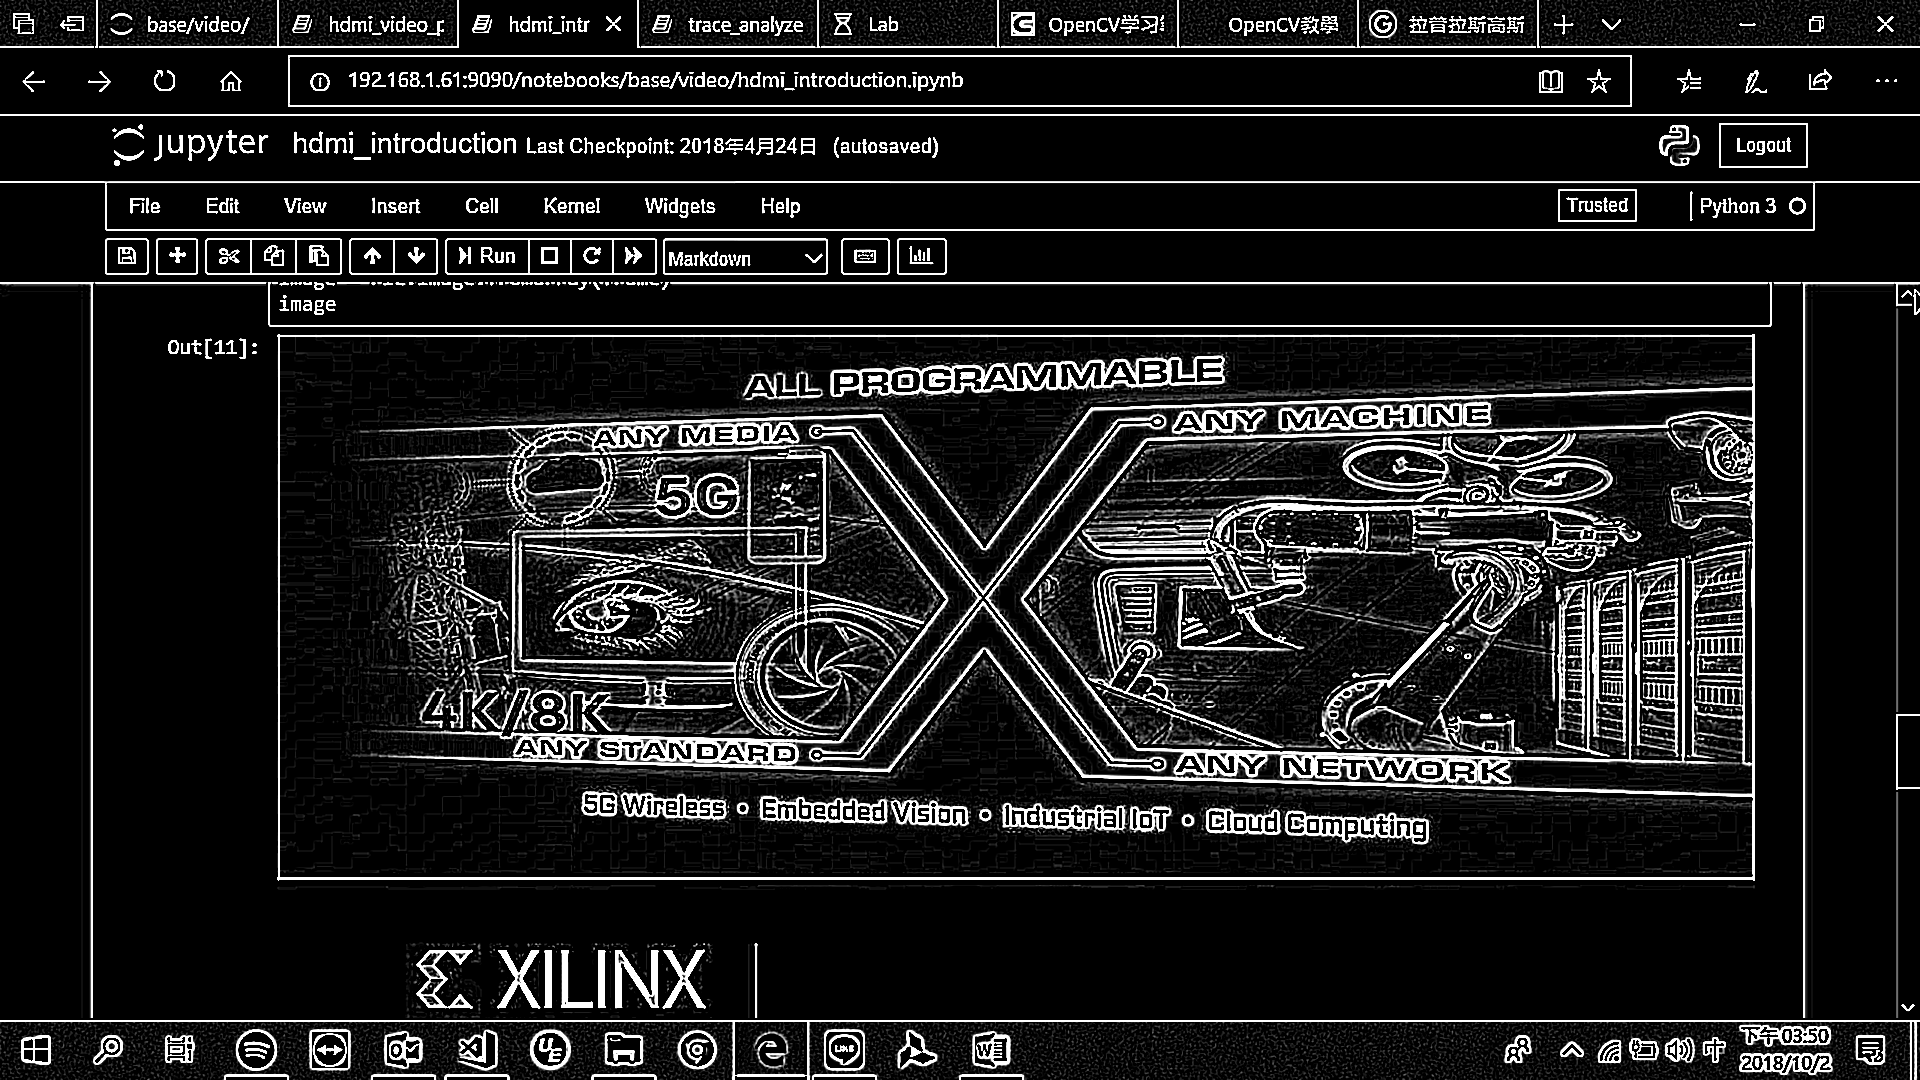

In [13]:
import PIL.Image

image = PIL.Image.fromarray(outframe)
image

In [ ]:
hdmi_in.close()
hdmi_out.close()